In [1]:
import pandas as pd
import numpy as np

In [2]:
from sqlalchemy import create_engine

In [3]:
pd.set_option('display.max_rows', 13)
pd.set_option('display.max_columns', 13)

In [4]:
sqlitedb_path = '../data/raw/herreradelduque.db'
engine = create_engine(f'sqlite:///{sqlitedb_path}')

In [5]:
pd.read_sql_query("SELECT * FROM sqlite_master WHERE type='table'", engine)

,type,name,tbl_name,rootpage,sql
0,table,rank_info,rank_info,2,CREATE TABLE rank_info (\n\tid BIGINT NOT NULL...
1,table,personal_info,personal_info,34,CREATE TABLE personal_info (\n\tid BIGINT NOT ...
2,table,business_info,business_info,155,CREATE TABLE business_info (\n\tid BIGINT NOT ...


In [6]:
rank_info = pd.read_sql_query("SELECT * FROM rank_info", engine)
rank_info

,id,name,position,Unnamed: 0
0,5788,anant asavABHOKHIN & FAmily,NaN,0
1,1023,aRASH FERDowsi,NaN,1
2,6230,banthoon LAMSAM & FAmily,NaN,2
3,4073,bill adderLEY & family,NaN,3
4,7648,boris ZINGARevich,NaN,4
...,...,...,...,...
2255,5027,zhao XIAOQIang,2204.0,2255
2256,1258,zHOU LIANGZHang,2205.0,2256
2257,7890,zhu XINGMing,2206.0,2257
2258,9083,zhuO JUN,2207.0,2258


In [7]:
rank_info.dtypes

id              int64
name           object
position      float64
Unnamed: 0      int64
dtype: object

In [8]:
personal_info = pd.read_sql_query("SELECT * FROM personal_info", engine)
personal_info

,id,lastName,age,Unnamed: 0,gender,country,image
0,6448,bEZOs,54 years old,52,M,United States,https://specials-images.forbesimg.com/imageser...
1,3509,GATES,62 years old,53,M,United States,https://specials-images.forbesimg.com/imageser...
2,3062,bufFETt,87 years old,54,Male,United States,https://specials-images.forbesimg.com/imageser...
3,5964,arnAULT,69 years old,55,M,None,https://specials-images.forbesimg.com/imageser...
4,1044,zUCKERBErg,1985,56,M,None,https://specials-images.forbesimg.com/imageser...
...,...,...,...,...,...,...,...
2203,5027,ZHAO,51 years old,2255,None,None,https://specials-images.forbesimg.com/imageser...
2204,1258,zHOU,55 years old,2256,M,None,https://specials-images.forbesimg.com/imageser...
2205,7890,ZHU,51 years old,2257,None,None,https://specials-images.forbesimg.com/imageser...
2206,9083,zHUO,52 years old,2258,None,None,https://specials-images.forbesimg.com/imageser...


In [9]:
personal_info.dtypes

id             int64
lastName      object
age           object
Unnamed: 0     int64
gender        object
country       object
image         object
dtype: object

In [10]:
business_info = pd.read_sql_query("SELECT * FROM personal_info", engine)
display(business_info)

,id,lastName,age,Unnamed: 0,gender,country,image
0,6448,bEZOs,54 years old,52,M,United States,https://specials-images.forbesimg.com/imageser...
1,3509,GATES,62 years old,53,M,United States,https://specials-images.forbesimg.com/imageser...
2,3062,bufFETt,87 years old,54,Male,United States,https://specials-images.forbesimg.com/imageser...
3,5964,arnAULT,69 years old,55,M,None,https://specials-images.forbesimg.com/imageser...
4,1044,zUCKERBErg,1985,56,M,None,https://specials-images.forbesimg.com/imageser...
...,...,...,...,...,...,...,...
2203,5027,ZHAO,51 years old,2255,None,None,https://specials-images.forbesimg.com/imageser...
2204,1258,zHOU,55 years old,2256,M,None,https://specials-images.forbesimg.com/imageser...
2205,7890,ZHU,51 years old,2257,None,None,https://specials-images.forbesimg.com/imageser...
2206,9083,zHUO,52 years old,2258,None,None,https://specials-images.forbesimg.com/imageser...


In [11]:
business_info.dtypes

id             int64
lastName      object
age           object
Unnamed: 0     int64
gender        object
country       object
image         object
dtype: object

In [12]:
#data cleaning for rank table:
rank_info.isnull().sum()

id             0
name           0
position      52
Unnamed: 0     0
dtype: int64

In [13]:
null_cols_rank = rank_info.isnull().sum()
null_cols_rank[null_cols_rank > 0]

position    52
dtype: int64

In [14]:
null_cols_rank[null_cols_rank > 0]/ len(rank_info)*100

position    2.300885
dtype: float64

In [15]:
!pip install missingno

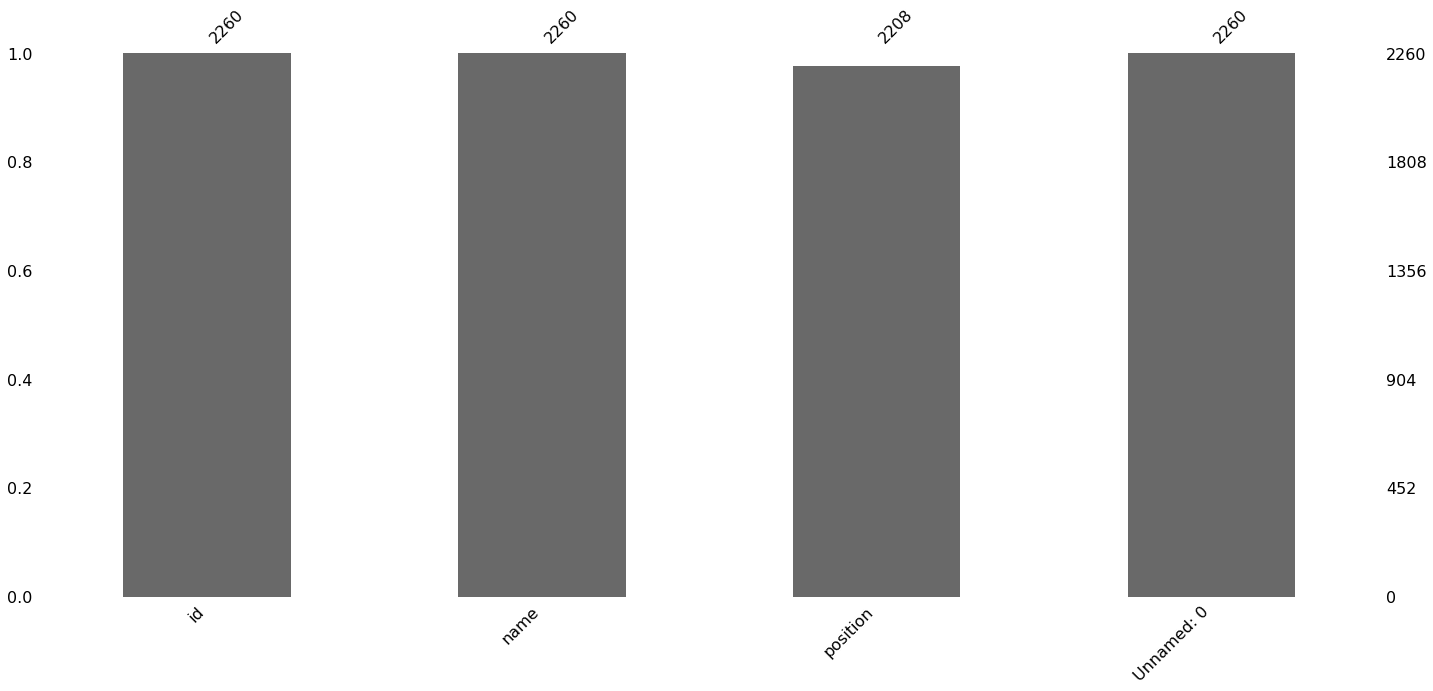

In [17]:
import missingno
%matplotlib inline
#represented the hole dataset
data_rank = rank_info.sample(2260, random_state=42)
missingno.bar(data_rank);

In [18]:
len(data_rank.columns)

4

In [19]:
#drop column 'Unnamed:0'
rank_info_dropped_unnamend0 = rank_info.drop('Unnamed: 0', axis = 1)
rank_info_dropped_unnamend0

,id,name,position
0,5788,anant asavABHOKHIN & FAmily,NaN
1,1023,aRASH FERDowsi,NaN
2,6230,banthoon LAMSAM & FAmily,NaN
3,4073,bill adderLEY & family,NaN
4,7648,boris ZINGARevich,NaN
...,...,...,...
2255,5027,zhao XIAOQIang,2204.0
2256,1258,zHOU LIANGZHang,2205.0
2257,7890,zhu XINGMing,2206.0
2258,9083,zhuO JUN,2207.0
